In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Trainingset_India.csv')
df.head()

,Year,CO2 emissions
0,1960,0.267634
1,1961,0.283704
2,1962,0.305851
3,1963,0.321795
4,1964,0.308169


In [3]:
df.shape

(54, 2)

## Let's visualize our dataset

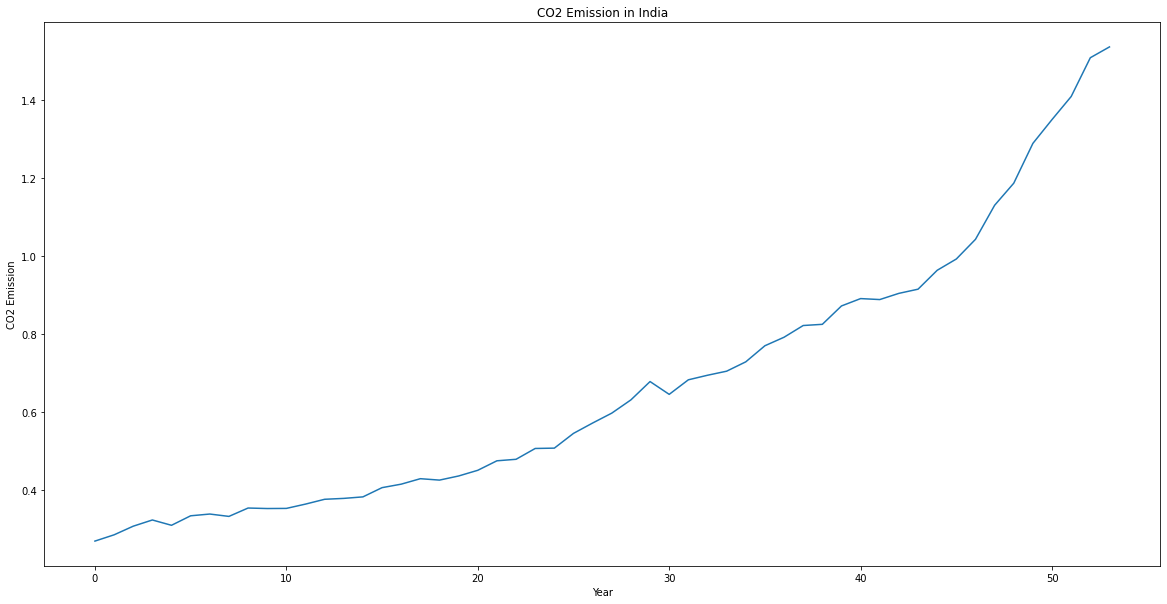

In [5]:
plt.figure(figsize=(20,10)) 
plt.title("CO2 Emission in India")
plt.xlabel("Year")
plt.ylabel('CO2 Emission')
plt.plot(df['CO2 emissions'])
plt.show()

#### The dataset of CO2 emissions of India spans from 1960 to 2018 and we will try to predict the emission for the last 4 years (2014-2018)

In [6]:
future_years = 4
df['Prediction'] = df[['CO2 emissions']].shift(-future_years)
df.head(4)

,Year,CO2 emissions,Prediction
0,1960,0.267634,0.308169
1,1961,0.283704,0.332527
2,1962,0.305851,0.337039
3,1963,0.321795,0.330974


In [7]:
x = np.array(df.drop(['Prediction'],1))[:-future_years]
print(x)

[[1.96000000e+03 2.67634188e-01]
 [1.96100000e+03 2.83703708e-01]
 [1.96200000e+03 3.05850957e-01]
 [1.96300000e+03 3.21794976e-01]
 [1.96400000e+03 3.08168697e-01]
 [1.96500000e+03 3.32527209e-01]
 [1.96600000e+03 3.37039496e-01]
 [1.96700000e+03 3.30973864e-01]
 [1.96800000e+03 3.52457485e-01]
 [1.96900000e+03 3.51187330e-01]
 [1.97000000e+03 3.51488938e-01]
 [1.97100000e+03 3.62529742e-01]
 [1.97200000e+03 3.74899181e-01]
 [1.97300000e+03 3.77193439e-01]
 [1.97400000e+03 3.81064005e-01]
 [1.97500000e+03 4.04751113e-01]
 [1.97600000e+03 4.13696987e-01]
 [1.97700000e+03 4.27724734e-01]
 [1.97800000e+03 4.24114076e-01]
 [1.97900000e+03 4.34690107e-01]
 [1.98000000e+03 4.49266666e-01]
 [1.98100000e+03 4.73644451e-01]
 [1.98200000e+03 4.77490561e-01]
 [1.98300000e+03 5.05276830e-01]
 [1.98400000e+03 5.06132025e-01]
 [1.98500000e+03 5.43976973e-01]
 [1.98600000e+03 5.70556170e-01]
 [1.98700000e+03 5.95939661e-01]
 [1.98800000e+03 6.29950476e-01]
 [1.98900000e+03 6.76937713e-01]
 [1.990000

C:\Users\bhava\AppData\Local\Temp/ipykernel_8960/242065460.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(['Prediction'],1))[:-future_years]


In [9]:
y = np.array(df['Prediction'])[:-future_years]
print(y)

[0.3081687  0.33252721 0.3370395  0.33097386 0.35245749 0.35118733
 0.35148894 0.36252974 0.37489918 0.37719344 0.381064   0.40475111
 0.41369699 0.42772473 0.42411408 0.43469011 0.44926667 0.47364445
 0.47749056 0.50527683 0.50613202 0.54397697 0.57055617 0.59593966
 0.62995048 0.67693771 0.64410203 0.68142967 0.69312123 0.70354462
 0.72752609 0.76883767 0.79066315 0.82074131 0.82377981 0.8709435
 0.88982752 0.88733016 0.903242   0.91396207 0.96243574 0.99139958
 1.0418398  1.12921679 1.18590477 1.288081   1.34921447 1.40831559
 1.50782098 1.53556006]


#### We will split the datset into the training and test datset, here in this case the training dataset is equivalent to 0.93 out of the 58 observation values

In [10]:
x_train,x_test,y_train ,y_test = train_test_split(x,y, test_size = 0.93)

In [11]:
tree = DecisionTreeRegressor().fit(x_train,y_train)

In [12]:
lr = LinearRegression().fit(x_train,y_train)

In [13]:
x_future = df.drop(['Prediction'],1)[:-future_years]
x_future = x_future.tail(future_years)
x_future = np.array(x_future)
x_future

C:\Users\bhava\AppData\Local\Temp/ipykernel_8960/4154835032.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df.drop(['Prediction'],1)[:-future_years]


array([[2.00600000e+03, 1.04183980e+00],
       [2.00700000e+03, 1.12921679e+00],
       [2.00800000e+03, 1.18590477e+00],
       [2.00900000e+03, 1.28808100e+00]])

In [14]:
x_future.shape

(4, 2)

In [28]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[1.34921447 1.34921447 1.34921447 1.34921447]

[1.34921447 1.51121767 1.6125217  1.80379602]


C:\Users\bhava\AppData\Local\Temp/ipykernel_8960/3061104847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Prediction'] = tree_prediction


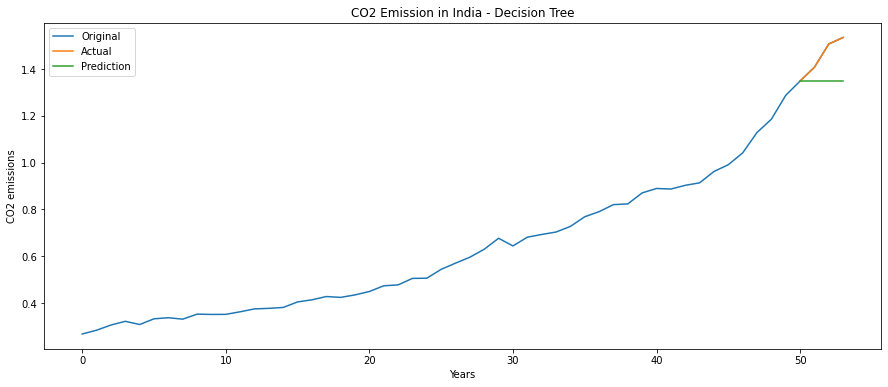

In [29]:
z = df[x.shape[0]:]
z['Prediction'] = tree_prediction
plt.figure(figsize=(15,6))
plt.title("CO2 Emission in India - Decision Tree")
plt.xlabel("Years")
plt.ylabel("CO2 emissions")
plt.plot(df['CO2 emissions'])
plt.plot(z[['CO2 emissions','Prediction']])
plt.legend(['Original','Actual','Prediction'])

In [33]:
x_test

array([[1.99100000e+03, 6.81429666e-01],
       [2.00900000e+03, 1.28808100e+00],
       [1.96200000e+03, 3.05850957e-01],
       [1.97500000e+03, 4.04751113e-01],
       [1.96000000e+03, 2.67634188e-01],
       [1.97600000e+03, 4.13696987e-01],
       [1.96800000e+03, 3.52457485e-01],
       [2.00000000e+03, 8.89827520e-01],
       [1.99800000e+03, 8.23779815e-01],
       [1.98700000e+03, 5.95939661e-01],
       [1.96700000e+03, 3.30973864e-01],
       [1.99500000e+03, 7.68837675e-01],
       [1.97000000e+03, 3.51488938e-01],
       [1.99000000e+03, 6.44102026e-01],
       [1.97700000e+03, 4.27724734e-01],
       [1.99400000e+03, 7.27526089e-01],
       [2.00200000e+03, 9.03241998e-01],
       [1.98500000e+03, 5.43976973e-01],
       [1.99600000e+03, 7.90663149e-01],
       [1.97200000e+03, 3.74899181e-01],
       [1.98000000e+03, 4.49266666e-01],
       [1.97400000e+03, 3.81064005e-01],
       [1.96100000e+03, 2.83703708e-01],
       [1.99900000e+03, 8.70943498e-01],
       [1.997000

In [30]:
from sklearn.metrics import mean_absolute_error
m = mean_absolute_error(x_future,z)
print(m)

ValueError: y_true and y_pred have different number of output (2!=3)

C:\Users\bhava\AppData\Local\Temp/ipykernel_8960/170872809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z1['Prediction'] = lr_prediction


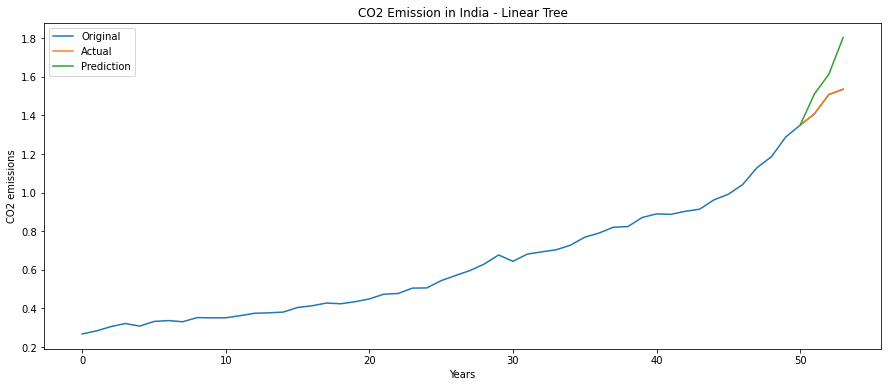

In [22]:
z1 = df[x.shape[0]:]
z1['Prediction'] = lr_prediction
plt.figure(figsize=(15,6))
plt.title("CO2 Emission in India - Linear Tree")
plt.xlabel("Years")
plt.ylabel("CO2 emissions")
plt.plot(df['CO2 emissions'])
plt.plot(z1[['CO2 emissions','Prediction']])
plt.legend(['Original','Actual','Prediction'])

In [25]:
z

,Year,CO2 emissions,Prediction
50,2010,1.349214,1.349214
51,2011,1.408316,1.511218
52,2012,1.507821,1.612522
53,2013,1.535560,1.803796


In [91]:
#The linear Regression is  more accurate than Decision Tree